# Notebook Marcell
Pengerjaan dari awal sampai akhir

# Import Libraries

In [54]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns',None)

# Dataset

In [55]:
df = pd.read_csv('train.csv')
df.head()

,id,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,NoOfObfuscatedChar,ObfuscationRatio,NoOfLettersInURL,LetterRatioInURL,NoOfDegitsInURL,DegitRatioInURL,NoOfEqualsInURL,NoOfQMarkInURL,NoOfAmpersandInURL,NoOfOtherSpecialCharsInURL,SpacialCharRatioInURL,IsHTTPS,LineOfCode,LargestLineLength,HasTitle,Title,DomainTitleMatchScore,URLTitleMatchScore,HasFavicon,Robots,IsResponsive,NoOfURLRedirect,NoOfSelfRedirect,HasDescription,NoOfPopup,NoOfiFrame,HasExternalFormSubmit,HasSocialNet,HasSubmitButton,HasHiddenFields,HasPasswordField,Bank,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,1,NaN,https://www.northcm.ac.th,24.0,www.northcm.ac.th,17.0,0.0,NaN,0.800000,NaN,NaN,NaN,2.0,0.0,NaN,0.0,NaN,0.417,0.0,0.000,0.0,0.0,0.0,2.0,0.083,NaN,NaN,457.0,NaN,norhcmac,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,0.0,5.0,0.0,NaN,NaN,NaN,0.0,NaN,0.0,0.0,1.0,NaN,3.0,NaN,69.0,NaN,NaN,1
1,4,8135291.txt,http://uqr.to/1il1z,NaN,NaN,NaN,NaN,to,1.000000,0.000896,0.036850,2.0,0.0,NaN,0.0,NaN,8.0,0.421,2.0,0.105,NaN,NaN,0.0,2.0,NaN,NaN,9.0,NaN,1.0,NaN,NaN,100.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1.0,0
2,5,586561.txt,https://www.woolworthsrewards.com.au,35.0,www.woolworthsrewards.com.au,28.0,0.0,au,0.857143,NaN,0.060894,NaN,2.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1.0,woolworthsrewrdscom,0.0,0.0,1.0,0.0,1.0,NaN,1.0,NaN,0.0,3.0,0.0,NaN,NaN,1.0,1.0,1.0,1.0,0.0,1.0,33.0,7.0,8.0,15.0,NaN,2.0,1
3,6,NaN,NaN,31.0,NaN,NaN,NaN,com,0.562500,0.522907,0.055829,NaN,1.0,NaN,0.0,NaN,17.0,NaN,0.0,0.000,NaN,0.0,0.0,NaN,0.065,NaN,NaN,5062.0,NaN,NaN,100.0,100.0,NaN,0.0,NaN,0.0,0.0,0.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,1.0,24.0,5.0,14.0,NaN,NaN,NaN,1
4,11,412632.txt,NaN,NaN,www.nyprowrestling.com,22.0,0.0,NaN,1.000000,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0.0,0.000,NaN,0.0,NaN,1.0,0.034,1.0,766.0,NaN,NaN,nyprowrestling,100.0,100.0,1.0,1.0,NaN,0.0,NaN,1.0,0.0,0.0,NaN,1.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,14.0,NaN,0.0,NaN,1


# Apply Change

## Rename Column ( biar enak aje)

In [56]:
df.columns

Index(['id', 'FILENAME', 'URL', 'URLLength', 'Domain', 'DomainLength',
       'IsDomainIP', 'TLD', 'CharContinuationRate', 'TLDLegitimateProb',
       'URLCharProb', 'TLDLength', 'NoOfSubDomain', 'HasObfuscation',
       'NoOfObfuscatedChar', 'ObfuscationRatio', 'NoOfLettersInURL',
       'LetterRatioInURL', 'NoOfDegitsInURL', 'DegitRatioInURL',
       'NoOfEqualsInURL', 'NoOfQMarkInURL', 'NoOfAmpersandInURL',
       'NoOfOtherSpecialCharsInURL', 'SpacialCharRatioInURL', 'IsHTTPS',
       'LineOfCode', 'LargestLineLength', 'HasTitle', 'Title',
       'DomainTitleMatchScore', 'URLTitleMatchScore', 'HasFavicon', 'Robots',
       'IsResponsive', 'NoOfURLRedirect', 'NoOfSelfRedirect', 'HasDescription',
       'NoOfPopup', 'NoOfiFrame', 'HasExternalFormSubmit', 'HasSocialNet',
       'HasSubmitButton', 'HasHiddenFields', 'HasPasswordField', 'Bank', 'Pay',
       'Crypto', 'HasCopyrightInfo', 'NoOfImage', 'NoOfCSS', 'NoOfJS',
       'NoOfSelfRef', 'NoOfEmptyRef', 'NoOfExternalRef', 'label'],

In [57]:
df.rename({
    'SpacialCharRatioInURL' : 'SpecialCharRatioInURL',
    'NoOfDegitsInURL': 'NoOfDigitsInURL',
    'DegitRatioInURL':'DigitRatioInURL',
    

},inplace=True)

## URLLength semua valuenya kurang satu dari panjang sebenarnya

In [58]:
df['URL'] = df['URL'].apply(lambda x: str(x) if pd.notna(x) else np.nan)
df['URLLength'] = df['URL'].apply(lambda x: len(x) if pd.notna(x) else 0)

## Drop id dan filename (simpen ID)
ga guna pas prediksi

In [59]:
id = df['id']

In [60]:
df.drop(['id','FILENAME'],axis=1,inplace=True)

# Domain Extraction

In [61]:
from urllib.parse import urlparse

def extract_domain(url):
    if pd.isna(url):
        return np.nan
    else:
        parsed = urlparse(url)
        return parsed.netloc

df['Domain'] = df['URL'].apply(extract_domain)    

In [62]:
df['DomainLength'] = df['Domain'].apply(lambda x:len(x) if pd.notna(x) else 0)

# TLD
semua yang top 10 di TLD value counts itu majority legitimate

## Isi missing values di tld dari domain

In [63]:
import tldextract
# isi missing values TLD

# Misal df adalah DataFrame yang memiliki kolom 'URL' dan 'TLD'

# Fungsi untuk mengekstrak TLD dari URL
def extract_tld_from_url(url):
    if pd.isna(url):  # Cek jika URL kosong
        return url
    extracted = tldextract.extract(url)
    return extracted.suffix  # Mengambil TLD

# Menambahkan kolom TLD dengan hasil ekstraksi dari URL
df['TLD'] = df['TLD'].fillna(df['URL'].apply(extract_tld_from_url))

# Menampilkan hasil setelah diisi
print(df[['URL', 'TLD']])

                                         URL    TLD
0                  https://www.northcm.ac.th  ac.th
1                        http://uqr.to/1il1z     to
2       https://www.woolworthsrewards.com.au     au
3                                        NaN    com
4                                        NaN    NaN
...                                      ...    ...
140399                                   NaN    NaN
140400   https://www.greenmountainenergy.com    com
140401       https://www.leadcastingcall.com    com
140402                https://www.fedarb.com    com
140403           https://www.risenenergy.com    com

[140404 rows x 2 columns]


In [64]:
df[df['TLD'] == 'nl']['label'].value_counts()

label
1    1324
0      15
Name: count, dtype: int64

## Fungsi buat dapetin tld dengan jumlah label 0 lebih banyak

In [65]:
# Misal df adalah DataFrame yang memiliki kolom 'TLD' dan 'label'

# Buat fungsi untuk mendapatkan counts 0 dan 1 untuk setiap TLD
def get_tld_counts(tld):
    # Filter data berdasarkan TLD
    tld_data = df[df['TLD'] == tld]
    
    # Hitung nilai counts untuk kolom 'label'
    label_counts = tld_data['label'].value_counts()
    
    # Pastikan label_counts memiliki nilai untuk 0 dan 1
    count_0 = label_counts.get(0, 0)  # Jika 0 tidak ada, default 0
    count_1 = label_counts.get(1, 0)  # Jika 1 tidak ada, default 0
    
    return count_0, count_1

# Iterasi untuk semua TLD yang ada dalam kolom 'TLD'
tld_filtered = []
for tld in df['TLD'].unique():
    count_0, count_1 = get_tld_counts(tld)
    if count_0 > count_1:
        tld_filtered.append(tld)

# Menampilkan TLD yang memiliki jumlah 0 lebih banyak daripada 1
print("TLD dengan nilai 0 lebih banyak daripada 1:", tld_filtered)


TLD dengan nilai 0 lebih banyak daripada 1: ['website', 'gq', 'co', 'work', 'site', 'app', 'cfd', 'dev', 'xyz', 'link', 'live', 'ga', 'club', 'cf', 'top', 'page', 'sh', 'vip', 'ml', 'gd', 'digital', 'cloud', 'fun', 'cx', 'ink', '163', 'shop', 'icu', 'one', 'tk', '24', 'buzz', 'date', 'rest', 'gle', 'online', 'video', 'ly', 'vg', 'net.br', 'gift', '', '254:30332', 'goog', 'ltd', 'gp', 'lc', 'host', 'ht', 'social', 'tc', 'lol', '227', '167', 'bio', '203', 'pw', 'services', 'boutique', '12', 'win', 'coach', '206', '128', 'cyou', '197', 'email', 'com.ee', 'vu', '232', 'mom', '182', 'click', 'land', 'loan', '134', 'stream', '67', '26', '223', '160', '238', '13', '146', '78', '69', '84', 'lat', '140', 'quest', '181', '148', 'bid', 'my.id', '240', 'fit', 'black', 'review', '27', '51', 'biz.id', 'limo', 'monster', 'fr:443', 'gf', 'info.pl', 'gov.sy', 'pink', 'ms', 'bond', 'nom.co', 'skin', '121', '108', 'tel', 'navy', 'lr', 'xn--p1ai', 'hosting', 'edu.bd', 'ac.ae', 'nf']


In [66]:
tld_filtered

['website',
 'gq',
 'co',
 'work',
 'site',
 'app',
 'cfd',
 'dev',
 'xyz',
 'link',
 'live',
 'ga',
 'club',
 'cf',
 'top',
 'page',
 'sh',
 'vip',
 'ml',
 'gd',
 'digital',
 'cloud',
 'fun',
 'cx',
 'ink',
 '163',
 'shop',
 'icu',
 'one',
 'tk',
 '24',
 'buzz',
 'date',
 'rest',
 'gle',
 'online',
 'video',
 'ly',
 'vg',
 'net.br',
 'gift',
 '',
 '254:30332',
 'goog',
 'ltd',
 'gp',
 'lc',
 'host',
 'ht',
 'social',
 'tc',
 'lol',
 '227',
 '167',
 'bio',
 '203',
 'pw',
 'services',
 'boutique',
 '12',
 'win',
 'coach',
 '206',
 '128',
 'cyou',
 '197',
 'email',
 'com.ee',
 'vu',
 '232',
 'mom',
 '182',
 'click',
 'land',
 'loan',
 '134',
 'stream',
 '67',
 '26',
 '223',
 '160',
 '238',
 '13',
 '146',
 '78',
 '69',
 '84',
 'lat',
 '140',
 'quest',
 '181',
 '148',
 'bid',
 'my.id',
 '240',
 'fit',
 'black',
 'review',
 '27',
 '51',
 'biz.id',
 'limo',
 'monster',
 'fr:443',
 'gf',
 'info.pl',
 'gov.sy',
 'pink',
 'ms',
 'bond',
 'nom.co',
 'skin',
 '121',
 '108',
 'tel',
 'navy',
 'lr'

# CharContinuationRate

ubah nilai char continuation rate sesuai dengna rumus

In [67]:
import re
def char_continuation_rate(url):
    if not isinstance(url, str):  # Cek apakah URL adalah string
        return 0  # Jika bukan string, kembalikan nilai 0
    
    # Menghilangkan karakter non-alfanumerik untuk fokus pada karakter huruf dan angka
    cleaned_url = re.sub(r'[^a-zA-Z0-9]', '', url)
    
    # Inisialisasi variabel untuk menghitung pasangan karakter berurutan
    continuation_count = 0
    
    # Iterasi melalui cleaned_url untuk menghitung pasangan karakter berurutan
    for i in range(1, len(cleaned_url)):
        if cleaned_url[i] == cleaned_url[i - 1]:  # Cek apakah karakter berurutan sama
            continuation_count += 1
    
    # Hitung CharContinuationRate (rasio pasangan berurutan terhadap panjang URL)
    char_continuation_rate = continuation_count / len(cleaned_url) if len(cleaned_url) > 0 else 0
    
    return char_continuation_rate

In [68]:
df_test = df.copy()

In [69]:
df_test['CharContinuationRate'] = df_test['URL'].apply(char_continuation_rate)

In [70]:
df_test['CharContinuationRate']

0         0.157895
1         0.071429
2         0.166667
3         0.000000
4         0.000000
            ...   
140399    0.000000
140400    0.133333
140401    0.153846
140402    0.176471
140403    0.136364
Name: CharContinuationRate, Length: 140404, dtype: float64

In [71]:
df['CharContinuationRate'] = df_test['CharContinuationRate']

## Benerin TLDLength

In [72]:
df['TLDLength'] = df['TLD'].apply(lambda x:len(x) if pd.notna(x) else 0)

# TLDLegitimatePROb

## Buat algoritma legtimate TLD prob sendiri (buat gantiin TLDLegitimateProb)

In [73]:
# df.groupby('TLD')['label'].value_counts().unstack(fill_value=0)
# tld_counts = df.groupby('TLD')['label'].value_counts().unstack(fill_value=0)

# # Tambahkan kolom yang menunjukkan apakah TLD lebih banyak phishing atau legitimate
# tld_counts['TLDMajoritylegitimate'] = tld_counts[0] > tld_counts[1]
# tld_counts['TLDMajoritylegitimate'] = tld_counts['TLDMajoritylegitimate'].map({True: 0, False: 1})


# '''
# 0: mayoritas TLD nya phising
# 1: mayoritas TLDnya legitimate

# '''

In [74]:
df_test.groupby('TLD')['label'].value_counts().unstack(fill_value=0)
tld_counts = df_test.groupby('TLD')['label'].value_counts().unstack(fill_value=0)
tld_counts['TLDMajoritylegitimate'] = tld_counts[0] > tld_counts[1]
tld_counts['TLDMajoritylegitimate'] = tld_counts['TLDMajoritylegitimate'].map({True: 0, False: 1})

In [75]:
# Gabungkan hasil status ke DataFrame utama
df_test = df_test.merge(tld_counts[['TLDMajoritylegitimate']], on='TLD', how='left')

In [76]:
df_test

,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,NoOfObfuscatedChar,ObfuscationRatio,NoOfLettersInURL,LetterRatioInURL,NoOfDegitsInURL,DegitRatioInURL,NoOfEqualsInURL,NoOfQMarkInURL,NoOfAmpersandInURL,NoOfOtherSpecialCharsInURL,SpacialCharRatioInURL,IsHTTPS,LineOfCode,LargestLineLength,HasTitle,Title,DomainTitleMatchScore,URLTitleMatchScore,HasFavicon,Robots,IsResponsive,NoOfURLRedirect,NoOfSelfRedirect,HasDescription,NoOfPopup,NoOfiFrame,HasExternalFormSubmit,HasSocialNet,HasSubmitButton,HasHiddenFields,HasPasswordField,Bank,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label,TLDMajoritylegitimate
0,https://www.northcm.ac.th,25,www.northcm.ac.th,17,0.0,ac.th,0.157895,NaN,NaN,NaN,2.0,0.0,NaN,0.0,NaN,0.417,0.0,0.000,0.0,0.0,0.0,2.0,0.083,NaN,NaN,457.0,NaN,norhcmac,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,0.0,5.0,0.0,NaN,NaN,NaN,0.0,NaN,0.0,0.0,1.0,NaN,3.0,NaN,69.0,NaN,NaN,1,1.0
1,http://uqr.to/1il1z,19,uqr.to,6,NaN,to,0.071429,0.000896,0.036850,2.0,0.0,NaN,0.0,NaN,8.0,0.421,2.0,0.105,NaN,NaN,0.0,2.0,NaN,NaN,9.0,NaN,1.0,NaN,NaN,100.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1.0,0,1.0
2,https://www.woolworthsrewards.com.au,36,www.woolworthsrewards.com.au,28,0.0,au,0.166667,NaN,0.060894,NaN,2.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1.0,woolworthsrewrdscom,0.0,0.0,1.0,0.0,1.0,NaN,1.0,NaN,0.0,3.0,0.0,NaN,NaN,1.0,1.0,1.0,1.0,0.0,1.0,33.0,7.0,8.0,15.0,NaN,2.0,1,1.0
3,NaN,0,NaN,0,NaN,com,0.000000,0.522907,0.055829,NaN,1.0,NaN,0.0,NaN,17.0,NaN,0.0,0.000,NaN,0.0,0.0,NaN,0.065,NaN,NaN,5062.0,NaN,NaN,100.0,100.0,NaN,0.0,NaN,0.0,0.0,0.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,1.0,24.0,5.0,14.0,NaN,NaN,NaN,1,1.0
4,NaN,0,NaN,0,0.0,NaN,0.000000,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0.0,0.000,NaN,0.0,NaN,1.0,0.034,1.0,766.0,NaN,NaN,nyprowrestling,100.0,100.0,1.0,1.0,NaN,0.0,NaN,1.0,0.0,0.0,NaN,1.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,14.0,NaN,0.0,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140399,NaN,0,NaN,0,0.0,NaN,0.000000,0.079963,0.059055,3.0,1.0,0.0,NaN,NaN,NaN,0.519,0.0,0.000,0.0,0.0,0.0,NaN,0.037,NaN,835.0,1286.0,1.0,slavevoyages,NaN,NaN,NaN,0.0,1.0,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.0,NaN,0.0,0.0,NaN,0.0,1.0,23.0,3.0,6.0,NaN,12.0,NaN,1,NaN
140400,https://www.greenmountainenergy.com,35,www.greenmountainenergy.com,27,0.0,com,0.133333,0.522907,0.064465,3.0,NaN,0.0,NaN,0.0,NaN,NaN,0.0,0.000,0.0,0.0,NaN,NaN,NaN,NaN,3429.0,1826.0,1.0,greenmountainenergy,NaN,100.0,1.0,1.0,1.0,0.0,NaN,1.0,1.0,0.0,0.0,1.0,1.0,1.0,NaN,1.0,1.0,NaN,1.0,26.0,NaN,NaN,169.0,15.0,40.0,1,1.0
140401,https://www.leadcastingcall.com,31,www.leadcastingcall.com,23,NaN,com,0.153846,0.522907,NaN,3.0,1.0,0.0,0.0,0.0,NaN,0.567,NaN,0.000,0.0,NaN,0.0,1.0,NaN,NaN,860.0,NaN,1.0,leadcastingcall,100.0,100.0,0.0,1.0,1.0,0.0,NaN,1.0,1.0,NaN,0.0,1.0,NaN,NaN,0.0,0.0,0.0,0.0,1.0,25.0,NaN,NaN,87.0,1.0,93.0,1,1.0
140402,https://www.fedarb.com,22,www.fedarb.com,14,NaN,com,0.176471,0.522907,NaN,NaN,NaN,0.0,0.0,0.0,8.0,0.381,0.0,NaN,NaN,NaN,0.0,1.0,0.048,NaN,816.0,NaN,NaN,NaN,100.0,NaN,NaN,NaN,1.0,NaN,0.0,NaN,0.0,4.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,36.0,NaN,102.0,NaN,NaN,1,1.0


In [77]:
df['TLDMajoritylegitimate'] = df_test['TLDMajoritylegitimate']

# NoOfSubDomain

In [78]:
# Fungsi untuk menghitung jumlah subdomain
def count_subdomains(domain):
    # Pastikan domain adalah string
    if isinstance(domain, str):
        parts = domain.split('.')
        # Jika domain hanya memiliki dua bagian, berarti tidak ada subdomain
        if len(parts) > 2:
            return len(parts) - 2  # Mengurangi 2 karena domain utama terdiri dari 2 bagian (misalnya example.com)
        else:
            return 0  # Tidak ada subdomain jika hanya ada domain utama
    else:
        return 0  # Jika domain bukan string (misalnya NaN atau float), anggap tidak ada subdomain

In [79]:
df_test['Domain'] = df_test['Domain'].apply(lambda x: str(x) if pd.notna(x) else np.nan)

In [80]:
df_test['NoOfSubDomain'] = df_test['Domain'].apply(count_subdomains)

In [81]:
df['NoOfSubDomain'] = df_test['NoOfSubDomain']

# Obfuscation
belum disentuh <br>
sejauh ini gua anggap aman

In [82]:
obfuscation = ['HasObfuscation',	'NoOfObfuscatedChar','ObfuscationRatio']

In [83]:
df['HasObfuscation'].value_counts()

HasObfuscation
0.0    74654
1.0       30
Name: count, dtype: int64

In [84]:
df[df['HasObfuscation'] != 0][obfuscation]

,HasObfuscation,NoOfObfuscatedChar,ObfuscationRatio
1,NaN,0.0,NaN
2,NaN,NaN,0.0
3,NaN,0.0,NaN
4,NaN,NaN,0.0
6,NaN,NaN,0.0
...,...,...,...
140390,NaN,NaN,0.0
140392,NaN,NaN,NaN
140397,NaN,0.0,NaN
140398,NaN,0.0,NaN


# NoOfLettersInURL sampai SpacialCharRatioInURL

In [85]:
def extract_url_features(df):
    def count_letters(url):
        if isinstance(url, str):  # Pastikan URL adalah string
            return len(re.findall(r'[a-zA-Z]', url))  # Menghitung jumlah huruf
        return 0  # Jika bukan string, return 0

    def count_digits(url):
        if isinstance(url, str):  # Pastikan URL adalah string
            return len(re.findall(r'\d', url))  # Menghitung jumlah digit
        return 0  # Jika bukan string, return 0

    def count_equals(url):
        if isinstance(url, str):  # Pastikan URL adalah string
            return url.count('=')  # Menghitung jumlah '='
        return 0  # Jika bukan string, return 0

    def count_qmark(url):
        if isinstance(url, str):  # Pastikan URL adalah string
            return url.count('?')  # Menghitung jumlah '?'
        return 0  # Jika bukan string, return 0

    def count_ampersand(url):
        if isinstance(url, str):  # Pastikan URL adalah string
            return url.count('&')  # Menghitung jumlah '&'
        return 0  # Jika bukan string, return 0

    def count_special_chars(url):
        if isinstance(url, str):  # Pastikan URL adalah string
            special_chars = re.findall(r'[^a-zA-Z0-9\s]', url)  # Menghitung karakter selain alphanumeric dan spasi
            return len(special_chars)
        return 0  # Jika bukan string, return 0

    def calc_spacial_char_ratio(url):
        if isinstance(url, str):  # Pastikan URL adalah string
            special_count = count_special_chars(url)
            return special_count / len(url) if len(url) > 0 else 0  # Rasio karakter khusus terhadap panjang URL
        return 0  # Jika bukan string, return 0

    # Fungsi untuk menghitung rasio huruf dan angka
    def calc_letter_ratio(url):
        if isinstance(url, str):  # Pastikan URL adalah string
            letter_count = count_letters(url)
            return letter_count / len(url) if len(url) > 0 else 0  # Rasio huruf terhadap panjang URL
        return 0  # Jika bukan string, return 0

    def calc_digit_ratio(url):
        if isinstance(url, str):  # Pastikan URL adalah string
            digit_count = count_digits(url)
            return digit_count / len(url) if len(url) > 0 else 0  # Rasio angka terhadap panjang URL
        return 0  # Jika bukan string, return 0

    # Menerapkan fungsi pada kolom URL untuk setiap fitur
    df['NoOfLettersInURL'] = df['URL'].apply(count_letters)
    df['LetterRatioInURL'] = df['URL'].apply(calc_letter_ratio)
    df['NoOfDegitsInURL'] = df['URL'].apply(count_digits)
    df['DegitRatioInURL'] = df['URL'].apply(calc_digit_ratio)
    df['NoOfEqualsInURL'] = df['URL'].apply(count_equals)
    df['NoOfQMarkInURL'] = df['URL'].apply(count_qmark)
    df['NoOfAmpersandInURL'] = df['URL'].apply(count_ampersand)
    df['NoOfOtherSpecialCharsInURL'] = df['URL'].apply(count_special_chars)
    df['SpacialCharRatioInURL'] = df['URL'].apply(calc_spacial_char_ratio)

    return df

In [86]:
df_test = extract_url_features(df_test)

In [87]:
df_test.columns

Index(['URL', 'URLLength', 'Domain', 'DomainLength', 'IsDomainIP', 'TLD',
       'CharContinuationRate', 'TLDLegitimateProb', 'URLCharProb', 'TLDLength',
       'NoOfSubDomain', 'HasObfuscation', 'NoOfObfuscatedChar',
       'ObfuscationRatio', 'NoOfLettersInURL', 'LetterRatioInURL',
       'NoOfDegitsInURL', 'DegitRatioInURL', 'NoOfEqualsInURL',
       'NoOfQMarkInURL', 'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL',
       'SpacialCharRatioInURL', 'IsHTTPS', 'LineOfCode', 'LargestLineLength',
       'HasTitle', 'Title', 'DomainTitleMatchScore', 'URLTitleMatchScore',
       'HasFavicon', 'Robots', 'IsResponsive', 'NoOfURLRedirect',
       'NoOfSelfRedirect', 'HasDescription', 'NoOfPopup', 'NoOfiFrame',
       'HasExternalFormSubmit', 'HasSocialNet', 'HasSubmitButton',
       'HasHiddenFields', 'HasPasswordField', 'Bank', 'Pay', 'Crypto',
       'HasCopyrightInfo', 'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef',
       'NoOfEmptyRef', 'NoOfExternalRef', 'label', 'TLDMajoritylegiti

# IsHTTPS
awalnya make https apa ngga


In [88]:
def is_https(url):
    if isinstance(url, str):  # Ensure the URL is a string
        return url.lower().startswith('https://')
    return False  # If not a valid string, return False

In [89]:
df['IsHTTPS'] = df['URL'].apply(is_https)

In [90]:
df['IsHTTPS'] = df['IsHTTPS'].map({
    True:1,
    False:0
})

# Line Of Code dan LargestLineLength

kemungkinan besar gua drop. Ga ngaruh apa apa

# HasTitle dan Title
DomainTitleMatchScore	URLTitleMatchScore

# DomainTitleMatchScore dan URLTitleMatchScore
urusan belakangan

In [91]:
df

,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,NoOfObfuscatedChar,ObfuscationRatio,NoOfLettersInURL,LetterRatioInURL,NoOfDegitsInURL,DegitRatioInURL,NoOfEqualsInURL,NoOfQMarkInURL,NoOfAmpersandInURL,NoOfOtherSpecialCharsInURL,SpacialCharRatioInURL,IsHTTPS,LineOfCode,LargestLineLength,HasTitle,Title,DomainTitleMatchScore,URLTitleMatchScore,HasFavicon,Robots,IsResponsive,NoOfURLRedirect,NoOfSelfRedirect,HasDescription,NoOfPopup,NoOfiFrame,HasExternalFormSubmit,HasSocialNet,HasSubmitButton,HasHiddenFields,HasPasswordField,Bank,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label,TLDMajoritylegitimate
0,https://www.northcm.ac.th,25,www.northcm.ac.th,17,0.0,ac.th,0.157895,NaN,NaN,5,2,0.0,NaN,0.0,NaN,0.417,0.0,0.000,0.0,0.0,0.0,2.0,0.083,1,NaN,457.0,NaN,norhcmac,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,0.0,5.0,0.0,NaN,NaN,NaN,0.0,NaN,0.0,0.0,1.0,NaN,3.0,NaN,69.0,NaN,NaN,1,1.0
1,http://uqr.to/1il1z,19,uqr.to,6,NaN,to,0.071429,0.000896,0.036850,2,0,NaN,0.0,NaN,8.0,0.421,2.0,0.105,NaN,NaN,0.0,2.0,NaN,0,9.0,NaN,1.0,NaN,NaN,100.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1.0,0,1.0
2,https://www.woolworthsrewards.com.au,36,www.woolworthsrewards.com.au,28,0.0,au,0.166667,NaN,0.060894,2,2,NaN,NaN,0.0,NaN,NaN,0.0,NaN,0.0,0.0,0.0,NaN,NaN,1,NaN,NaN,1.0,woolworthsrewrdscom,0.0,0.0,1.0,0.0,1.0,NaN,1.0,NaN,0.0,3.0,0.0,NaN,NaN,1.0,1.0,1.0,1.0,0.0,1.0,33.0,7.0,8.0,15.0,NaN,2.0,1,1.0
3,NaN,0,NaN,0,NaN,com,0.000000,0.522907,0.055829,3,0,NaN,0.0,NaN,17.0,NaN,0.0,0.000,NaN,0.0,0.0,NaN,0.065,0,NaN,5062.0,NaN,NaN,100.0,100.0,NaN,0.0,NaN,0.0,0.0,0.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,1.0,24.0,5.0,14.0,NaN,NaN,NaN,1,1.0
4,NaN,0,NaN,0,0.0,NaN,0.000000,NaN,NaN,0,0,NaN,NaN,0.0,NaN,NaN,0.0,0.000,NaN,0.0,NaN,1.0,0.034,0,766.0,NaN,NaN,nyprowrestling,100.0,100.0,1.0,1.0,NaN,0.0,NaN,1.0,0.0,0.0,NaN,1.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,14.0,NaN,0.0,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140399,NaN,0,NaN,0,0.0,NaN,0.000000,0.079963,0.059055,0,0,0.0,NaN,NaN,NaN,0.519,0.0,0.000,0.0,0.0,0.0,NaN,0.037,0,835.0,1286.0,1.0,slavevoyages,NaN,NaN,NaN,0.0,1.0,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.0,NaN,0.0,0.0,NaN,0.0,1.0,23.0,3.0,6.0,NaN,12.0,NaN,1,NaN
140400,https://www.greenmountainenergy.com,35,www.greenmountainenergy.com,27,0.0,com,0.133333,0.522907,0.064465,3,1,0.0,NaN,0.0,NaN,NaN,0.0,0.000,0.0,0.0,NaN,NaN,NaN,1,3429.0,1826.0,1.0,greenmountainenergy,NaN,100.0,1.0,1.0,1.0,0.0,NaN,1.0,1.0,0.0,0.0,1.0,1.0,1.0,NaN,1.0,1.0,NaN,1.0,26.0,NaN,NaN,169.0,15.0,40.0,1,1.0
140401,https://www.leadcastingcall.com,31,www.leadcastingcall.com,23,NaN,com,0.153846,0.522907,NaN,3,1,0.0,0.0,0.0,NaN,0.567,NaN,0.000,0.0,NaN,0.0,1.0,NaN,1,860.0,NaN,1.0,leadcastingcall,100.0,100.0,0.0,1.0,1.0,0.0,NaN,1.0,1.0,NaN,0.0,1.0,NaN,NaN,0.0,0.0,0.0,0.0,1.0,25.0,NaN,NaN,87.0,1.0,93.0,1,1.0
140402,https://www.fedarb.com,22,www.fedarb.com,14,NaN,com,0.176471,0.522907,NaN,3,1,0.0,0.0,0.0,8.0,0.381,0.0,NaN,NaN,NaN,0.0,1.0,0.048,1,816.0,NaN,NaN,NaN,100.0,NaN,NaN,NaN,1.0,NaN,0.0,NaN,0.0,4.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,36.0,NaN,102.0,NaN,NaN,1,1.0


#

# Corr

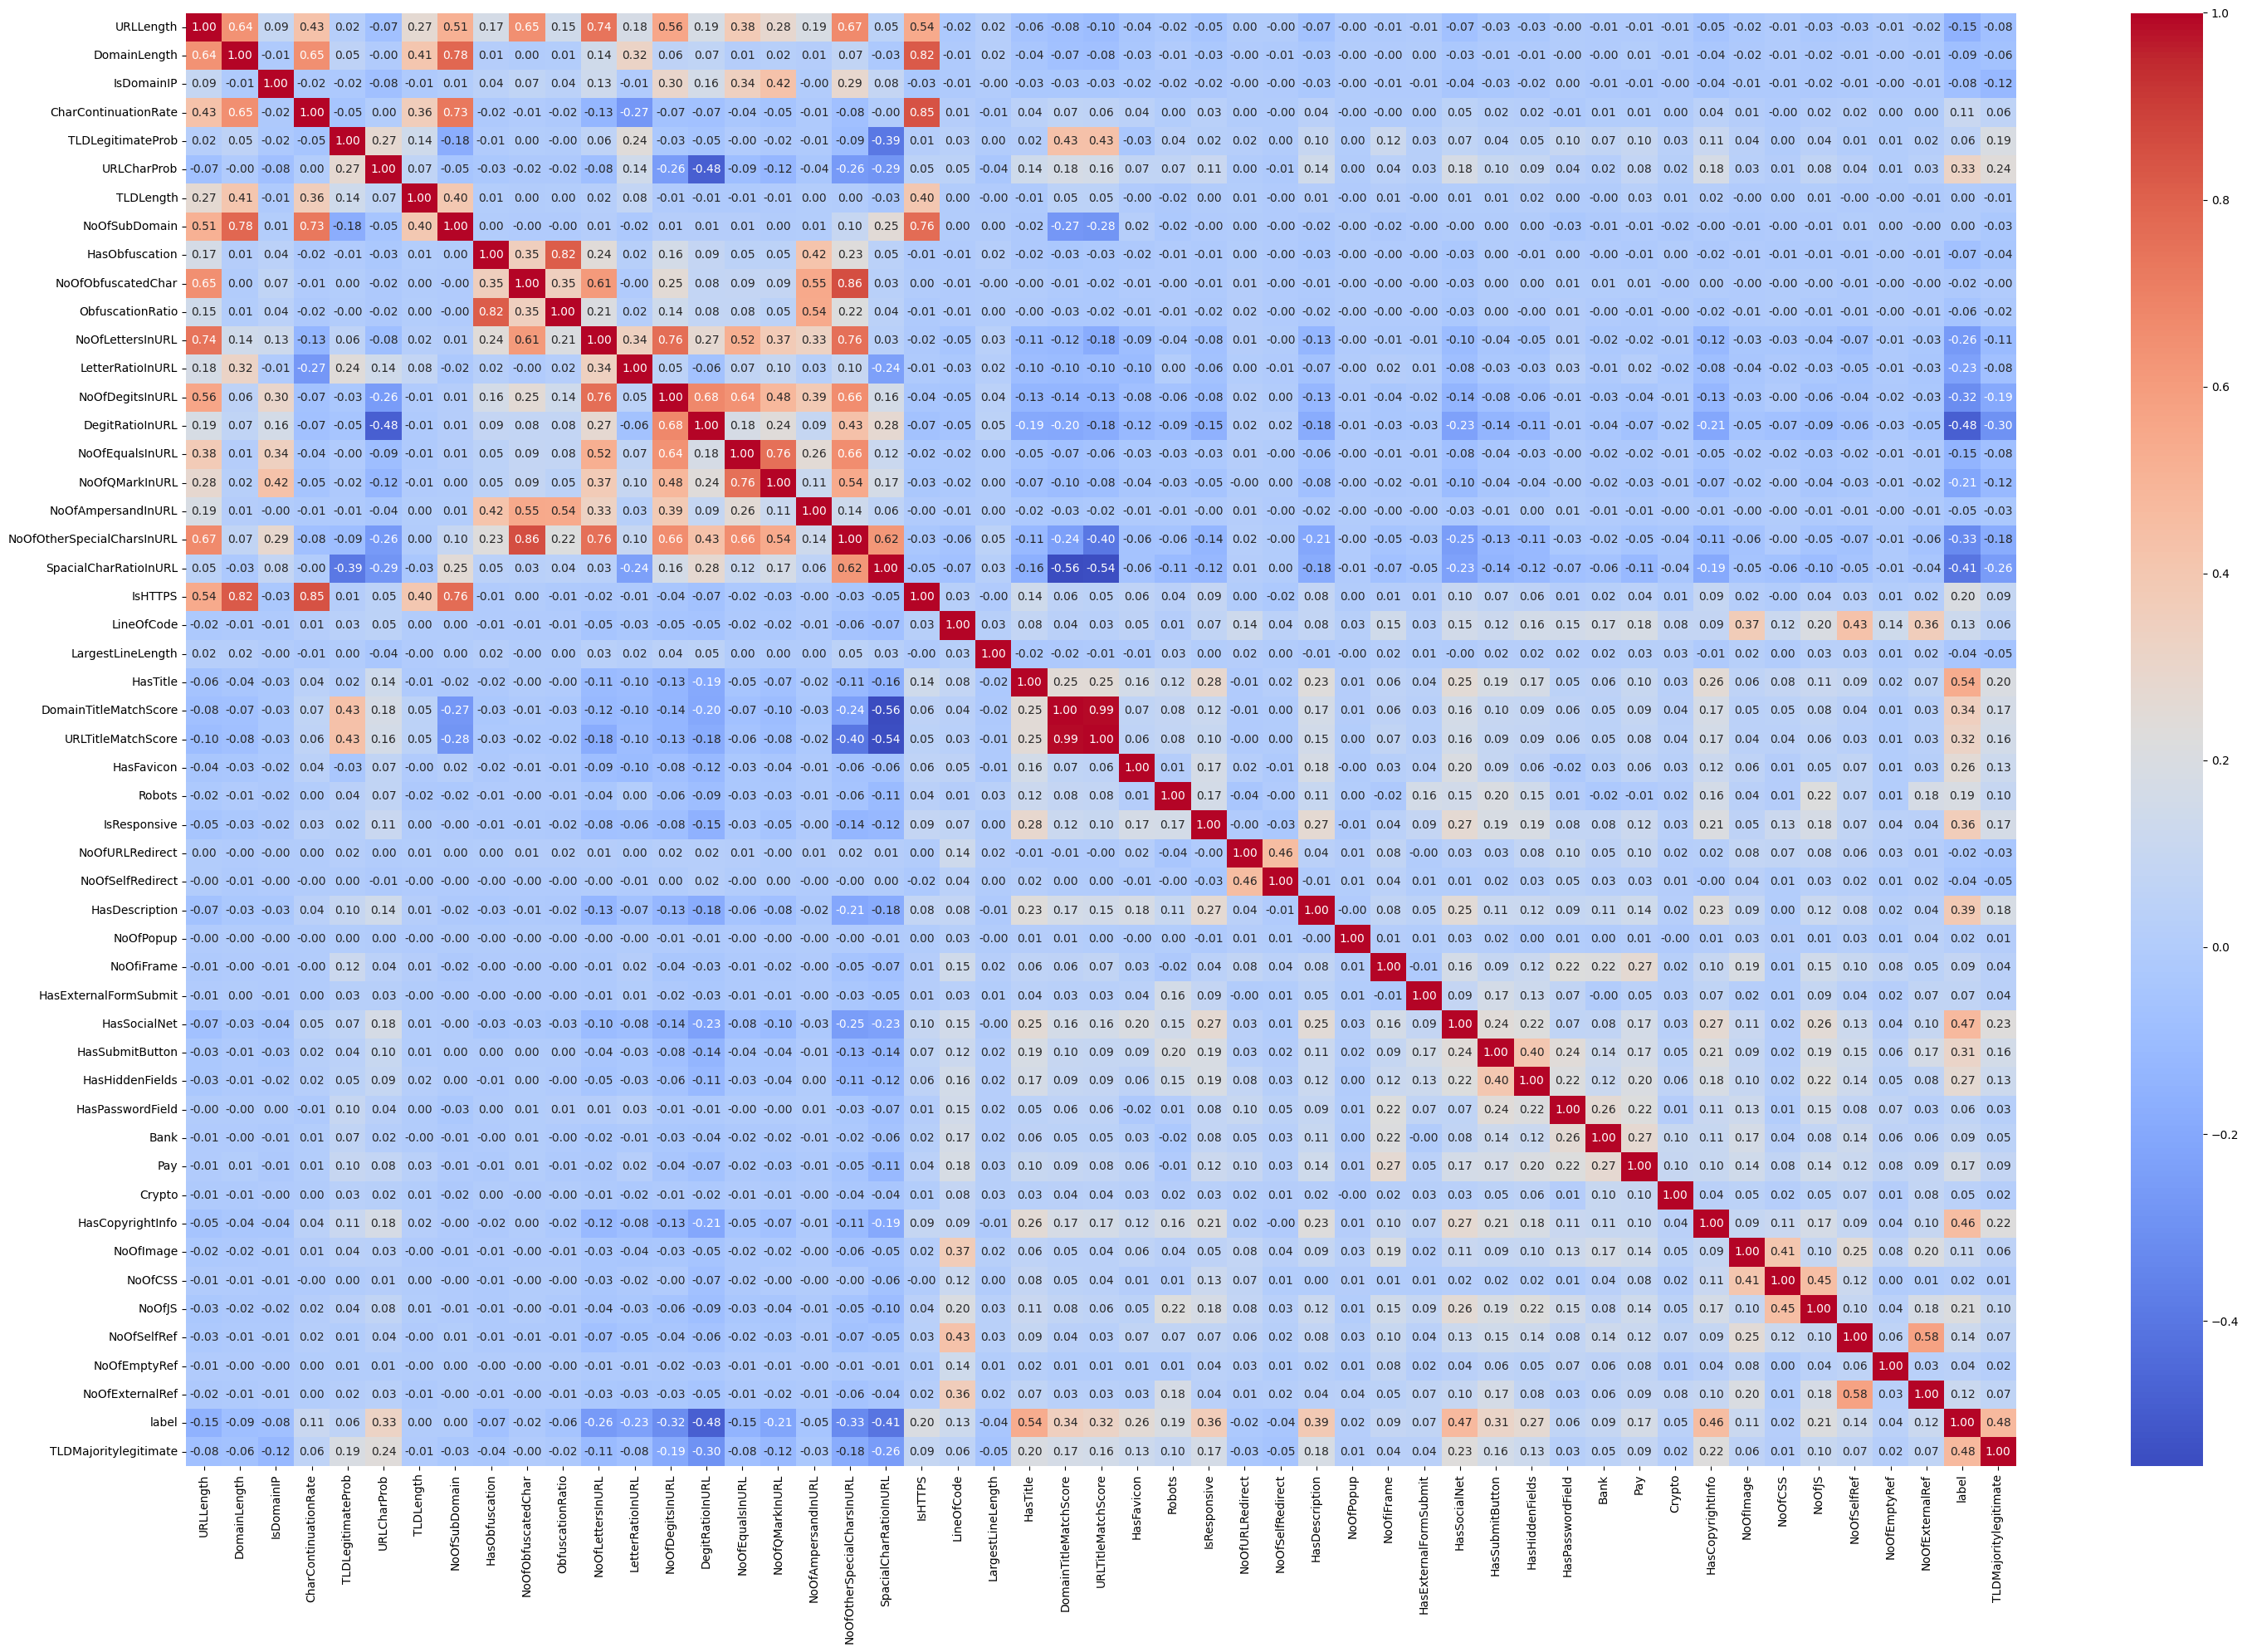

In [92]:
# Menghitung korelasi dengan metode Pearson
corr = df.select_dtypes('number').corr(method='pearson')

# Mengatur ukuran figure sebelum heatmap
plt.figure(figsize=(30, 20))

# Menampilkan heatmap korelasi
sns.heatmap(data=corr, annot=True, cmap='coolwarm', fmt='.2f')

# Menampilkan hasil plot
plt.tight_layout()
plt.show()

In [93]:
df.select_dtypes(exclude='number')

,URL,Domain,TLD,Title
0,https://www.northcm.ac.th,www.northcm.ac.th,ac.th,norhcmac
1,http://uqr.to/1il1z,uqr.to,to,NaN
2,https://www.woolworthsrewards.com.au,www.woolworthsrewards.com.au,au,woolworthsrewrdscom
3,NaN,NaN,com,NaN
4,NaN,NaN,NaN,nyprowrestling
...,...,...,...,...
140399,NaN,NaN,NaN,slavevoyages
140400,https://www.greenmountainenergy.com,www.greenmountainenergy.com,com,greenmountainenergy
140401,https://www.leadcastingcall.com,www.leadcastingcall.com,com,leadcastingcall
140402,https://www.fedarb.com,www.fedarb.com,com,NaN


# Feature Engineer

In [94]:
df.columns

Index(['URL', 'URLLength', 'Domain', 'DomainLength', 'IsDomainIP', 'TLD',
       'CharContinuationRate', 'TLDLegitimateProb', 'URLCharProb', 'TLDLength',
       'NoOfSubDomain', 'HasObfuscation', 'NoOfObfuscatedChar',
       'ObfuscationRatio', 'NoOfLettersInURL', 'LetterRatioInURL',
       'NoOfDegitsInURL', 'DegitRatioInURL', 'NoOfEqualsInURL',
       'NoOfQMarkInURL', 'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL',
       'SpacialCharRatioInURL', 'IsHTTPS', 'LineOfCode', 'LargestLineLength',
       'HasTitle', 'Title', 'DomainTitleMatchScore', 'URLTitleMatchScore',
       'HasFavicon', 'Robots', 'IsResponsive', 'NoOfURLRedirect',
       'NoOfSelfRedirect', 'HasDescription', 'NoOfPopup', 'NoOfiFrame',
       'HasExternalFormSubmit', 'HasSocialNet', 'HasSubmitButton',
       'HasHiddenFields', 'HasPasswordField', 'Bank', 'Pay', 'Crypto',
       'HasCopyrightInfo', 'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef',
       'NoOfEmptyRef', 'NoOfExternalRef', 'label', 'TLDMajoritylegiti

## Web Resources
gabungin kolom berhubungan web resources

In [95]:
web_src = ['NoOfImage', 'NoOfCSS', 'NoOfJS','NoOfSelfRef',
       'NoOfEmptyRef', 'NoOfExternalRef']

In [96]:
df['NoWebResource'] = df[web_src].sum(axis=1)

In [97]:
df['NoWebResource']

0          72.0
1           1.0
2          65.0
3          43.0
4          14.0
          ...  
140399     44.0
140400    250.0
140401    206.0
140402    138.0
140403    298.0
Name: NoWebResource, Length: 140404, dtype: float64

# Predict

In [98]:
target = df['label']
features = df.drop('label',axis=1)
features = features.drop(df.select_dtypes(exclude='number').columns,axis=1)

In [99]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [100]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
from sklearn.impute import SimpleImputer

# Membuat objek SimpleImputer untuk mengganti NaN dengan rata-rata
imputer = SimpleImputer(strategy='mean')  # Ganti dengan 'median' jika ingin menggunakan median

# Mengaplikasikan imputasi pada data training
X_train_imputed = imputer.fit_transform(X_train)

# Mengaplikasikan imputasi pada data testing (menggunakan parameter yang dipelajari dari data training)
X_test_imputed = imputer.transform(X_test)


In [101]:
from sklearn.preprocessing import StandardScaler

# Membuat objek StandardScaler
scaler = StandardScaler()

# Melakukan scaling pada data yang sudah diimputasi
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)


In [102]:
knn = KNeighborsClassifier(n_neighbors=5)  # Kamu bisa mengubah n_neighbors sesuai kebutuhan
knn.fit(X_train_scaled, y_train)


KNeighborsClassifier()

In [103]:
y_pred = knn.predict(X_test_scaled)

Akurasi: 0.9864
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.85      0.91      2152
           1       0.99      1.00      0.99     25929

    accuracy                           0.99     28081
   macro avg       0.98      0.92      0.95     28081
weighted avg       0.99      0.99      0.99     28081



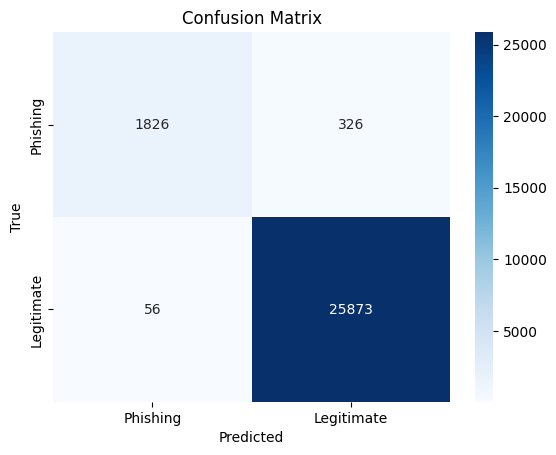

In [104]:
# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi: {accuracy:.4f}')

# Classification report (precision, recall, f1-score)
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Phishing', 'Legitimate'], yticklabels=['Phishing', 'Legitimate'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


# Evaluation